In [5]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import requests
import json

#Import API key
from api_keys_DT import geoapify_key

# File to Load (Remember to Change These)
horror_outputfile = "output/location_type.csv"

# Read horror movie Data File and store into Pandas DataFrames
horror_movie_locations = pd.read_csv(horror_outputfile)

#reduce to needed columns
horror_movie_locations_reduced = horror_movie_locations[["Review Rating", "Location Type"]].copy()

# Combine the data into a single dataset.  
# movie_data_merge = pd.merge(horror_movie_data, <highest grossing>, how="left", on=["?", "?"])
horror_movie_locations_reduced.head()

,Review Rating,Location Type
0,3.9,city
1,3.7,neighbourhood
2,6.5,quarter
3,4.6,region
4,3.6,neighbourhood


In [20]:
#clean data types parts of a city to city and types that could included multiple settings to Not found 
horror_movie_locations_reduced['Location Type'] = horror_movie_locations_reduced['Location Type'].replace({'neighbourhood':'city','subdistrict':'city','City':'city','borough': 'city', 'quarter': 'city', 'region':'city', 'county':'Not found', 'state': 'Not found', 'district': 'Not found','proviance':'Not found'})
horror_movie_locations_reduced

,Review Rating,Location Type
0,3.9,city
1,3.7,city
2,6.5,city
3,4.6,city
4,3.6,city
...,...,...
1955,6.3,city
1956,6.0,city
1957,4.6,city
1958,3.0,city


In [21]:
#average Rating per location type
all_location_type_df=horror_movie_locations_reduced.groupby(["Location Type"]).mean()
#drop not specified location types i.e not found, state, county, districts
location_type_df=all_location_type_df.drop(index="Not found")
location_type_df

,Review Rating
Location Type,
city,4.977675
hamlet,4.587500
municipality,5.450000
province,4.950000
suburb,5.068750
town,5.313433
village,4.991870


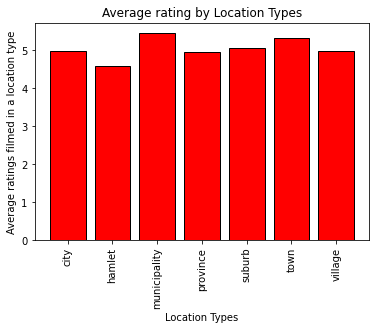

In [26]:

x_axis=np.arange(len(location_type_df))
y_axis=location_type_df["Review Rating"]

x_axis_list=list(location_type_df.index.values)

plt.bar(x_axis, y_axis, color=["red"], edgecolor=["black"], alpha=1, align="center") 

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis_list, rotation=90)


plt.title("Average rating by Location Types")
plt.xlabel("Location Types")
plt.ylabel("Average ratings filmed in a location type")
plt.savefig("output/Average_rating_by_location_tye.png")